In [4]:
from keras.models import Model
from keras import layers, Input

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,), dtype='int32', name='text') # 입력 길이가 정해지지 않은 정수 시퀀스
embedded_text = layers.Embedding(text_vocabulary_size, 64)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)

question_input = Input(shape=(None,), dtype='int32', name='question')
embedded_question = layers.Embedding(question_vocabulary_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)

answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)

model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [5]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 question (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 64)     640000      ['text[0][0]']                   
                                                                                                  
 embedding_3 (Embedding)        (None, None, 32)     320000      ['question[0][0]']               
                                                                                            

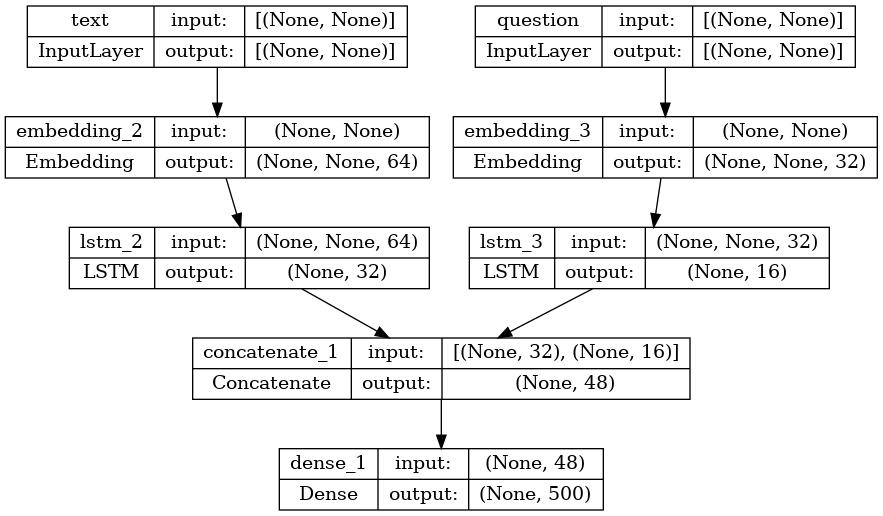

In [6]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

In [7]:
import numpy as np
from keras.utils import to_categorical

num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))

answers = np.random.randint(0, answer_vocabulary_size, size=num_samples)

answers = to_categorical(answers)

# numpy 배열 리스트 입력
model.fit([text, question], answers, epochs=10, batch_size=128)
# numpy 배열로 이루어진 딕셔너리 입력
# model.fit({'text':text, 'question':question}, answers, epochs=10, batch_size=128)

Epoch 1/10


2022-09-01 18:30:10.025838: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-01 18:30:10.231292: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


8/8 [==============================] - 4s 42ms/step - loss: 6.2149 - acc: 0.0010
Epoch 2/10
8/8 [==============================] - 0s 26ms/step - loss: 6.1989 - acc: 0.0300
Epoch 3/10
8/8 [==============================] - 0s 26ms/step - loss: 6.1685 - acc: 0.0250
Epoch 4/10
8/8 [==============================] - 0s 28ms/step - loss: 6.0873 - acc: 0.0070
Epoch 5/10
8/8 [==============================] - 0s 29ms/step - loss: 6.0102 - acc: 0.0100
Epoch 6/10
8/8 [==============================] - 0s 27ms/step - loss: 5.9111 - acc: 0.0190
Epoch 7/10
8/8 [==============================] - 0s 30ms/step - loss: 5.8001 - acc: 0.0130
Epoch 8/10
8/8 [==============================] - 0s 28ms/step - loss: 5.7051 - acc: 0.0130
Epoch 9/10
8/8 [==============================] - 0s 30ms/step - loss: 5.6102 - acc: 0.0190
Epoch 10/10
8/8 [==============================] - 0s 28ms/step - loss: 5.5349 - acc: 0.0240
